In [2]:
%pylab inline

plot_data = True

from sympy import Symbol, symbols, Function, Derivative, latex, exp, I, solve, lambdify, cos, sin
from IPython.display import Math, display
import numpy as np
from scipy import constants

from Electromagnetics.FourierBlochND import *
from Electromagnetics.SymExprTree import *

import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (6,6)


t, x, y = symbols('t x y')
E, J = symbols('E J')

omega, kx, ky, c = symbols(r'\omega k_x k_y c')
eps_r = symbols(r'\epsilon_r', real=True)
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0', real=True)

gamma, n_e, e, m_e, omega_p = symbols(r'\gamma n_e e m_e omega_p')
n_0, n_1 = symbols('n_0 n_1')
omega_m, kx_m, ky_m = symbols(r'\omega_m k_{xm} k_{ym}')

EQ_E = Derivative(E, x, 2) + Derivative(E, y, 2) - mu_0*eps_0*eps_r*Derivative(E, t, 2) - mu_0*Derivative(J, t, 1)
EQ_J = Derivative(J, t, 1) + gamma*J - n_e*e**2/m_e*E

display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

## plasma frequency
print("Plasma frequency")
EQ_J_p = EQ_J.subs(n_e, omega_p**2*m_e/e**2*eps_0*eps_r)
display(Math('EQ_{Jp} = ' + latex(EQ_J_p)))


BlochFact = exp(I*omega*t-I*kx*x-I*ky*y)
#EQ_E = EQ_E.subs([(E, E*BlochFact), (J, J*BlochFact)])
#EQ_J = EQ_J.subs([(E, Es*BlochFact), (J, Js*BlochFact)])
EQ_E = symExp_replaceSymbol(EQ_E, E, E*BlochFact)
EQ_E = symExp_replaceSymbol(EQ_E, J, J*BlochFact)

EQ_J = symExp_replaceSymbol(EQ_J, E, E*BlochFact)
EQ_J = symExp_replaceSymbol(EQ_J, J, J*BlochFact)


display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

harmonic = exp(n_0*I*kx_m*x + n_1*I*ky_m*y)

pde_E_FB = PDEFourierSeriesND(EQ_E, [E, J], n_dim=2, harmonic=harmonic, usexyz=False)
pde_J_FB = PDEFourierSeriesND(EQ_J, [E, J, n_e], n_dim=2, harmonic=harmonic, usexyz=False)

print("replace harmonics")
EQ_E_harm = pde_E_FB.putSums()#.doit()
EQ_J_harm = pde_J_FB.putSums()#.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply derivatives")
EQ_E_harm = EQ_E_harm.doit()
EQ_J_harm = EQ_J_harm.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply convolutions")
EQ_E_harm = pde_E_FB.applyConvolutions(EQ_E_harm)
EQ_J_harm = pde_J_FB.applyConvolutions(EQ_J_harm)
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply orthogonalities")
EQ_E_harm = (pde_E_FB.applyOrthogonalities(EQ_E_harm)/BlochFact).simplify()
EQ_J_harm = (pde_J_FB.applyOrthogonalities(EQ_J_harm)/BlochFact).simplify()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))


print("harmonic variables")
E_tilde, J_tilde = pde_E_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde)))
E_tilde, J_tilde, ne_tilde = pde_J_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde) + '~~~~' + latex(ne_tilde)))



Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plasma frequency


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

replace harmonics


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply derivatives


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply convolutions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply orthogonalities


<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic variables


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
## substitutions

pitch = 124
fwhm = 54

X_p = 1.0
Y_p = 1.0

eps_0_sub = 1.0
mu_0_sub = 1
kx_m_sub = 2*np.pi/X_p
ky_m_sub = 2*np.pi/Y_p
eps_r_sub = 11.7
e_sub = 1
m_e_sub = 1

def FWHMtoDecayRate(FWHM):
    return (2*np.sqrt(np.log(2)))/FWHM


f_p_norm = 1.2
w_p = f_p_norm*(2.0*np.pi)*constants.tera/(constants.c/(pitch*constants.micro))
gamma_sub = 1.0*constants.tera/(constants.c/(pitch*constants.micro))

n_e_max = w_p**2*eps_r_sub*eps_0_sub
n_e_x_decay_rate = FWHMtoDecayRate(fwhm/pitch)
n_e_y_decay_rate = n_e_x_decay_rate
n_e_x_center = X_p/2
n_e_y_center = Y_p/2

print("w_p = ", w_p)
print("decay_rate = ", n_e_x_decay_rate)

EQ_E_harm_kw = EQ_E_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (kx_m, kx_m_sub), (ky_m, ky_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])
EQ_J_harm_kw = EQ_J_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (kx_m, kx_m_sub), (ky_m, ky_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])


print("numerical substitution")
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_kw)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm_kw)))


k_rho, phi = symbols(r'k_\rho \phi')
EQ_E_harm_krho_w = EQ_E_harm_kw.subs([(kx, k_rho*cos(phi)), (ky, k_rho*sin(phi))])
EQ_J_harm_krho_w = EQ_J_harm_kw.subs([(kx, k_rho*cos(phi)), (ky, k_rho*sin(phi))])
print("polar form")
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_krho_w)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_E_harm_krho_w)))


w_p =  3.118617392664103
decay_rate =  3.823584140131649
numerical substitution


<IPython.core.display.Math object>

<IPython.core.display.Math object>

polar form


<IPython.core.display.Math object>

<IPython.core.display.Math object>

phi:  0.0


/home/nima/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


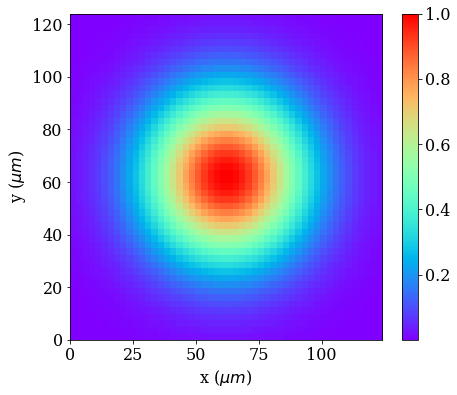

In [32]:
Ns = [8, 8]

def ne_fun(r):
    x_ = r[0] - np.floor(r[0]/X_p)*X_p
    x_ += (x_ < 0)*X_p
    y_ = r[1] - np.floor(r[1]/Y_p)*Y_p
    y_ += (y_ < 0)*Y_p
    assert np.all(x_>=0) and np.all(x_<X_p)
    assert np.all(y_>=0) and np.all(y_<Y_p)
    return n_e_max*np.exp(-n_e_x_decay_rate**2*(x_ - n_e_x_center)**2)\
            *np.exp(-n_e_y_decay_rate**2*(y_ - n_e_y_center)**2)


def get_ne_harmonics(Ns):
    ne_harm_vec = pde_J_FB.getFourierCoeffs(ne_fun, [0.0, 0.0], [X_p, Y_p], Ns)
    return ne_harm_vec

from enum import Enum
class EigSolveMethod(Enum):
    set_k_get_omega = 1,
    set_omega_get_kx = 2,
    set_omegaphi_get_krho = 3

A_mat_list = None

def set_matrices_list_wphi(w_i, phi_j, Ns):
    ## sets omega to w_i and and phi and looks for k_rho
    ## it takes losses into account by solving for a complex k_rho
    ne_harm_vec = get_ne_harmonics(Ns)
    
    EQ_E_fin = EQ_E_harm_krho_w.subs([(omega, w_i), (phi, phi_j)])
    EQ_J_fin = EQ_J_harm_krho_w.subs([(omega, w_i), (phi, phi_j)])

    expr_list = [EQ_E_fin, EQ_J_fin]
    vars = [E_tilde, J_tilde]
    pars = [ne_tilde]
    pars_vecs = [ne_harm_vec]
    eig_vars = [k_rho]
    pde_J_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_J_FB.calculateDenseMatrices = True

    A_mat_list = pde_J_FB.orthogonalToNumpyMatrix()
    return A_mat_list


kx_i = 1.0
ky_j = 0.0
k_rho_i = np.sqrt(kx_i**2 + ky_j**2)
phi_j = np.arctan2(ky_j, kx_i)
print("phi: ", phi_j)
w_i = 1.5

A_mat_list = set_matrices_list_wphi(w_i, phi_j, Ns)

if plot_data:
    x = np.linspace(0, X_p, 50)
    y = np.linspace(0, X_p, 50)
    x_mesh, y_mesh = np.meshgrid(x, y, indexing='ij')
    ne_mesh = ne_fun([x_mesh, y_mesh])
    ne_mesh /= np.max(ne_mesh)


    plt.imshow(ne_mesh, cmap="rainbow", extent=[0, pitch, 0, pitch], origin='lower', aspect='auto')
    plt.xlabel("x ($\mu m$)")
    plt.ylabel("y ($\mu m$)")
    plt.colorbar()
    savefig('other/periodicGaussian/lattice_127_62.png',  bbox_inches='tight', pad_inches=0.5)
    plt.show()



In [33]:
from Electromagnetics import Misc

solver = 'hybr' #'hybr'
handle_overflow = True
maxiter = 100
maxfev = 100
tol = 1.0e-6
tol_abs = False

A_eqs_list = [A_mat_list]


sing_val_tol = 1.0e-5
del_norm = 1.0e-5
sig_small = 1.0e-3j

_N_pp = 10

def get_eig_points_wphi(w_i, phi_j, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=[], get_eig_vecs=False):

    _N_2 = Ns[0]#int(Ns[0]/2)
    d_wc = 0.0
    d_dct = np.array([w_i+i*d_wc for i in range(-_N_2, _N_2)])

    roots_prev = []
    eig_points_krho = []
    eig_vecs_E = []
    eig_vecs_H = []

    for j in range(0, _N_pp+1):
        #eigvar_vals_0 = [j*w_i*np.sqrt(eps_r_sub)]
        eigvar_vals_0 = np.random.rand(1)*3.14#np.sqrt(kx_i**2 + ky_j**2)/np.sqrt(eps_r_sub)
        if j<len(eigs_prev):
            eigvar_vals_0 = [eigs_prev[j] + 0.1]
        if vbose:
            print(eigvar_vals_0)
        res = pde_J_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        print('success: ', res[2]['success'])
        krho_i = res[0][0]

        if vbose:
            print('k, omega: ', j, (krho_i, w_i), np.abs(res[1][0]))
        
        if res[2]['success']:
            #roots_prev.append([kx_i])
            eig_points_krho.append(krho_i)

        if get_eig_vecs:
            A_mat = res[3][0]
            rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
            if not rank==A_mat.shape[0]-1:
                print('rank: ', rank)
                print(sing_vals)
                assert False

            E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
            
            #d_dz = -np.array([k_i+i*d_k for i in range(-_N_2, _N_2)])
            #H_vec = -E_j*d_dz/d_dct
            
            if res[2]['success']:
                eig_vecs_E.append(E_j)
                #eig_vecs_H.append(H_vec)
            if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm and vbose:
                print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
                print(res[2])


    return [eig_points_krho, [eig_vecs_E, eig_vecs_H]]


[eig_points_krho, eig_vecs_EH] = get_eig_points_wphi(w_i, phi_j, Ns, _N_pp, A_eqs_list, vbose=True)
print(eig_points_krho)
    
    

[1.55716628]


/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1843: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1816: RuntimeWarning: overflow encountered in exp
  det_ = np.exp(log_dets_[i])


success:  True
k, omega:  0 ((-3.434636666159731+1.0877545335795915j), 1.5) 7.336258446179254e-12
[2.28960202]
success:  True
k, omega:  1 ((-3.4346366661144763+1.0877545336128025j), 1.5) 8.177242454429269e-13
[0.8020609]
success:  True
k, omega:  2 ((-3.434636666063439+1.0877545336198724j), 1.5) 8.870050052816476e-12
[1.42171223]
success:  True
k, omega:  3 ((-3.4346366897349703+1.0877545292279858j), 1.5) 3.2477742191052297e-09
[1.70956527]
success:  True
k, omega:  4 ((-3.434636666095321+1.0877545336781596j), 1.5) 8.385423002306043e-12
[1.18610554]
success:  True
k, omega:  5 ((-3.434636665880407+1.0877545336459225j), 1.5) 3.422284045429797e-11
[1.15671621]
success:  True
k, omega:  6 ((-3.4346366772835673+1.0877545377339413j), 1.5) 1.7052751355167028e-09
[1.45602976]
success:  True
k, omega:  7 ((-3.434636671991931+1.0877545313245343j), 1.5) 8.469497435247271e-10
[2.48694418]
success:  True
k, omega:  8 ((-2.8485486404717286-1.0877545327715967j), 1.5) 1.1766465490617512e-10
[1.75556

In [ ]:
##get dispsion curves


def GetDispersionCurves(phi_j, w_min, w_max, n_pts):
    w_pts = []
    k_pts = []
    w_arr = np.linspace(w_min, w_max, n_pts)

    eig_points_k_prev = []

    for i in range(n_pts):
        w_i = w_arr[i]
        A_mat_list = set_matrices_list_wphi(w_i, phi_j, Ns)
        A_eqs_list = [A_mat_list]

        print('-'*50)
        print(i, ": w = " , w_i, " phi :", phi_j)
        [eig_points_k, eig_vecs_E] = get_eig_points_wphi(w_i, phi_j, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=eig_points_k_prev)
        print(eig_points_k)
        eig_points_k_real = np.real(eig_points_k)
        for j in range(len(eig_points_k)):
            if len(eig_points_k_prev)==0:
                eig_points_k_prev.append(eig_points_k[j])
            else:
                eig_exists = False
                for _i_ in range(-5, 5):
                    if np.min(np.abs(np.array(eig_points_k_prev) - eig_points_k[j] + 2.0*_i_*np.pi/X_p)) < 0.05:
                        eig_exists = True
                if not eig_exists:
                    eig_points_k_prev.append(eig_points_k[j])

        k_pts.extend(np.array(eig_points_k).tolist())
        w_pts.extend([w_i]*len(eig_points_k))
    return w_pts, k_pts


w_min = 0.05
w_max = 1.0e12*(2.0*np.pi/(constants.c/(pitch*constants.micro)))
n_pts = 100

for phi_j in np.linspace(0.0, np.pi/4.0, 10, endpoint=True):
    w_pts, k_pts = GetDispersionCurves(phi_j, w_min, w_max, n_pts)
    filename = 'other/periodicGaussian/square_{}_{}_{}_{:.2f}_{:.1f}'.format(pitch, fwhm, n_pts, f_p_norm, phi_j*180/np.pi)
    np.savez(filename, w_pts=w_pts, k_pts=k_pts)
    print("wrote to {}.npz'".format(filename))


In [15]:
import os
file_no = 0

write = "y"
filename = 'other/periodicGaussian/square_124_54_GX_wp_1_5_2pi_no{}'.format(file_no)

#plot(k_pts, np.real(np.array(w_pts)), 'bo', markersize=1)
if os.path.exists(filename +'.npz'):
    #global write
    write = input("file will be overwritten. Sure (y/n)?")
if write == "y":
    np.savez(filename, w_pts=w_pts, k_pts=k_pts)
    print("wrote to {}.npz'".format(filename))

wrote to other/periodicGaussian/square_124_54_GX_wp_1_2_2pi_no0.npz'


loading  other/periodicGaussian/square_124_54_GX_wp_1_5_2pi_no0.npz
0


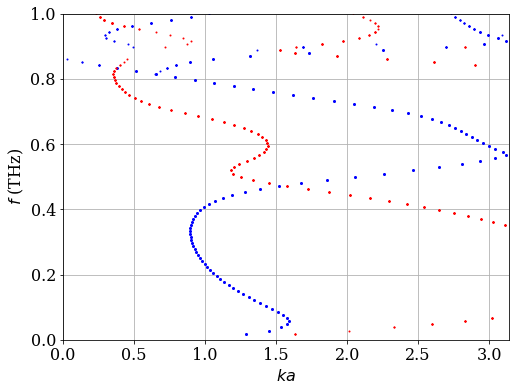

In [31]:
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

convert_to_si = True

for i in range(1):
    filename = 'other/periodicGaussian/square_124_54_GX_wp_1_5_2pi_no{}.npz'.format(i)
    print("loading ", filename)
    data = np.load(filename)
    w_pts_ = np.array(data['w_pts'])
    k_pts_ = np.array(data['k_pts'])
    
    if convert_to_si:
        w_pts_ *= (constants.c/(pitch*constants.micro))#/np.sqrt(eps_r_sub)
        #k_pts_ *= (2.0*np.pi/(pitch*constants.micro))
        pass
    
    print(len(w_pts))
    #print(k_pts)

    for _i_ in range(-10, 10):
        plot(np.real(k_pts_) + 2.0*_i_*np.pi/X_p, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
        plot(-np.real(k_pts_) + 2.0*_i_*np.pi/X_p, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
    plot(np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    #plot(-np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    
    k_diel_a = np.real(np.array(w_pts_))*np.sqrt(eps_r_sub) - 2.0*np.pi
    plot(k_diel_a, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=2)
    

xlabel('$ka$')
ylabel("$f$ (THz)")
xlim(0, np.pi)
ylim(0, 1.0)
grid()
savefig('other/periodicGaussian/square_124_54_GX_wp_1_2pi.png',  bbox_inches='tight', pad_inches=0.5)
show()

### read files in folder

Populating the interactive namespace from numpy and matplotlib
loading  other/periodicGaussian/angle sweep/square_124_54_100_1.40_45.0.npz
loading  other/periodicGaussian/angle sweep/square_124_54_100_1.40_45.0__2.npz


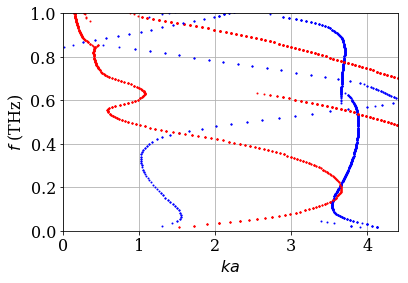

In [35]:
%pylab inline

from scipy import constants

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

convert_to_si = True
pitch = 124
X_p = 1
eps_r_sub = 11.7

files = ['square_124_54_100_1.40_45.0.npz', 'square_124_54_100_1.40_45.0__2.npz']

for file in files:
    filename = 'other/periodicGaussian/angle sweep/{}'.format(file)
    print("loading ", filename)
    data = np.load(filename)
    w_pts_ = np.array(data['w_pts'])
    k_pts_ = np.array(data['k_pts'])
    
    if convert_to_si:
        w_pts_ *= (constants.c/(pitch*constants.micro))#/np.sqrt(eps_r_sub)
        #k_pts_ *= (2.0*np.pi/(pitch*constants.micro))
        pass
    
    for _i_ in range(1):#(-10, 10):
        plot(np.real(k_pts_) + 2.0*_i_*np.pi/X_p, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
        plot(-np.real(k_pts_) + 2.0*_i_*np.pi/X_p, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
    plot(np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    plot(-np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    
    k_diel_a = np.real(np.array(w_pts_))*np.sqrt(eps_r_sub) - 2.0*np.pi
    plot(k_diel_a, np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=2)
    

xlabel('$ka$')
ylabel("$f$ (THz)")
xlim(0, 1.4*np.pi)
ylim(0, 1.0)
grid()
savefig('other/periodicGaussian/square_124_54_GX_wp_1_2pi.png',  bbox_inches='tight', pad_inches=0.5)
show()